# Cloud Services Portfolio Risk and Returns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
# Cloud Services Stock
symbols = ['AMZN','AAPL','GOOGL','FB','NFLX','CRM','INTC','DVMT','ADBE','CLDR','EQIX','FEYE','FIVN','PAYC']
start = '2016-01-01'
end = '2019-01-01'

In [3]:
df = yf.download(symbols,start,end)['Adj Close']

[*********************100%***********************]  14 of 14 downloaded


In [4]:
#df = pd.DataFrame()
#for s in symbols:
#    df[s] = yf.download(s,start,end)['Adj Close']

In [5]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
3 years


In [6]:
number_of_years = delta.years

In [7]:
days = (df.index[-1] - df.index[0]).days
days

1092

In [8]:
df.head()

,AAPL,ADBE,AMZN,CLDR,CRM,EQIX,FB,FEYE,FIVN,GOOGL,INTC,NFLX,PAYC
2016-01-04,98.446655,91.970001,636.989990,NaN,76.709999,272.723938,102.220001,21.870001,8.25,759.440002,30.453503,109.959999,35.970001
2016-01-05,95.979675,92.339996,633.789978,NaN,77.050003,279.475769,102.730003,21.639999,8.52,761.530029,30.310141,107.660004,34.869999
2016-01-06,94.101387,91.019997,632.650024,NaN,76.290001,284.744537,102.970001,20.530001,8.41,759.330017,29.638180,117.680000,34.990002
2016-01-07,90.129868,89.110001,607.940002,NaN,74.300003,279.365265,97.919998,19.010000,8.04,741.000000,28.527191,114.559998,35.540001
2016-01-08,90.606438,87.849998,607.049988,NaN,73.230003,285.352509,97.330002,18.320000,8.02,730.909973,28.231529,111.389999,33.259998


In [9]:
df.tail()

,AAPL,ADBE,AMZN,CLDR,CRM,EQIX,FB,FEYE,FIVN,GOOGL,INTC,NFLX,PAYC
2018-12-24,144.656540,205.160004,1343.959961,10.37,121.330002,332.392975,124.059998,15.390000,39.259998,984.669983,42.528996,233.880005,111.540001
2018-12-26,154.843475,222.949997,1470.900024,11.00,130.839996,342.442657,134.179993,16.090000,42.520000,1047.849976,45.065708,253.669998,120.220001
2018-12-27,153.838562,225.139999,1461.640015,10.95,135.199997,339.618958,134.520004,16.180000,43.009998,1052.900024,45.231571,255.570007,121.750000
2018-12-28,153.917389,223.130005,1478.020020,10.88,134.679993,345.952637,133.199997,16.090000,43.209999,1046.680054,45.612076,256.079987,121.239998
2018-12-31,155.405045,226.240005,1501.969971,11.06,136.970001,345.668335,131.089996,16.209999,43.720001,1044.959961,45.787697,267.660004,122.449997


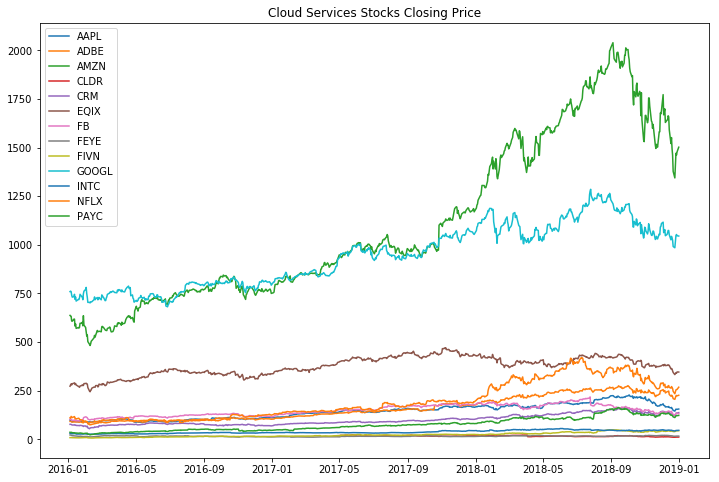

In [10]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title('Cloud Services Stocks Closing Price')
plt.legend(labels=df.columns)

In [11]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

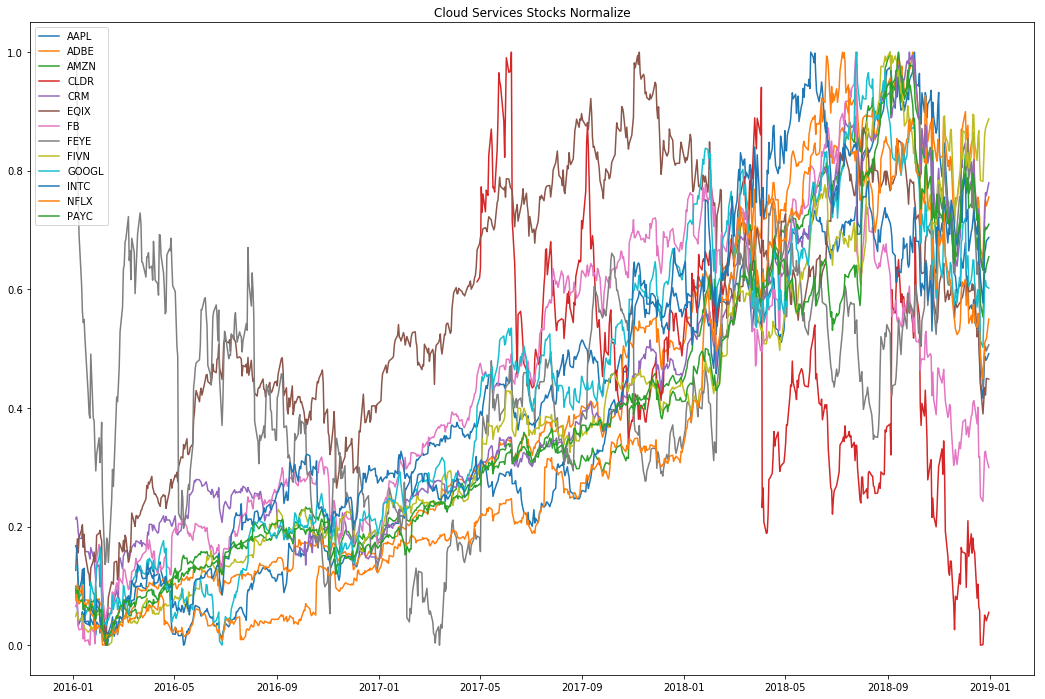

In [12]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Cloud Services Stocks Normalize')
plt.legend(labels=normalize.columns)

In [13]:
stock_rets = df.pct_change().dropna()

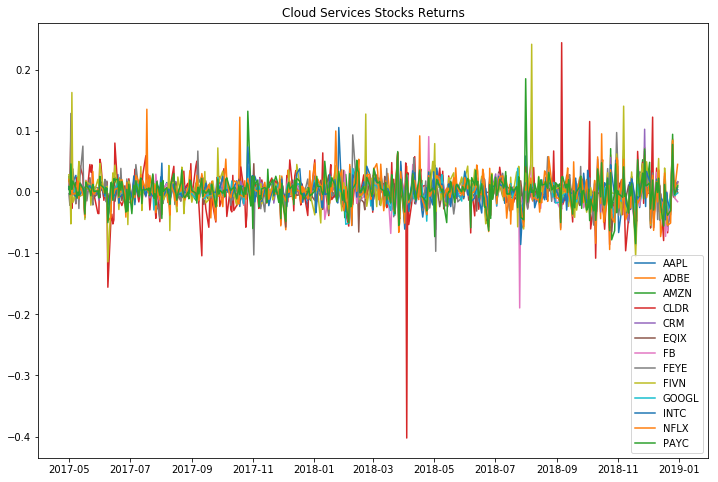

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title('Cloud Services Stocks Returns')
plt.legend(labels=stock_rets.columns)

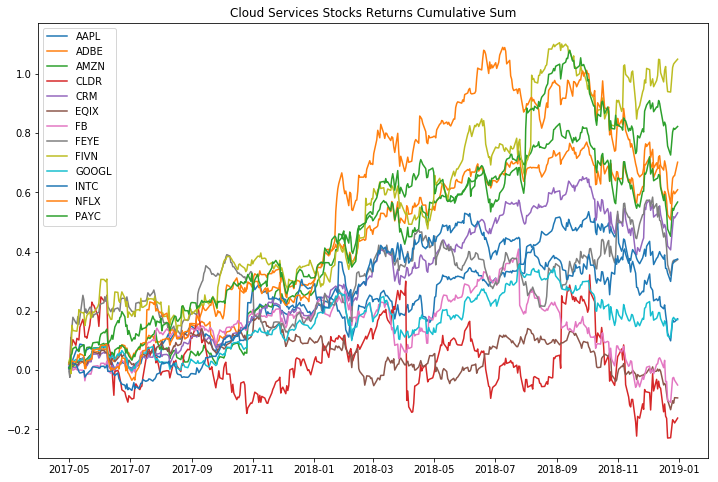

In [15]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Cloud Services Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

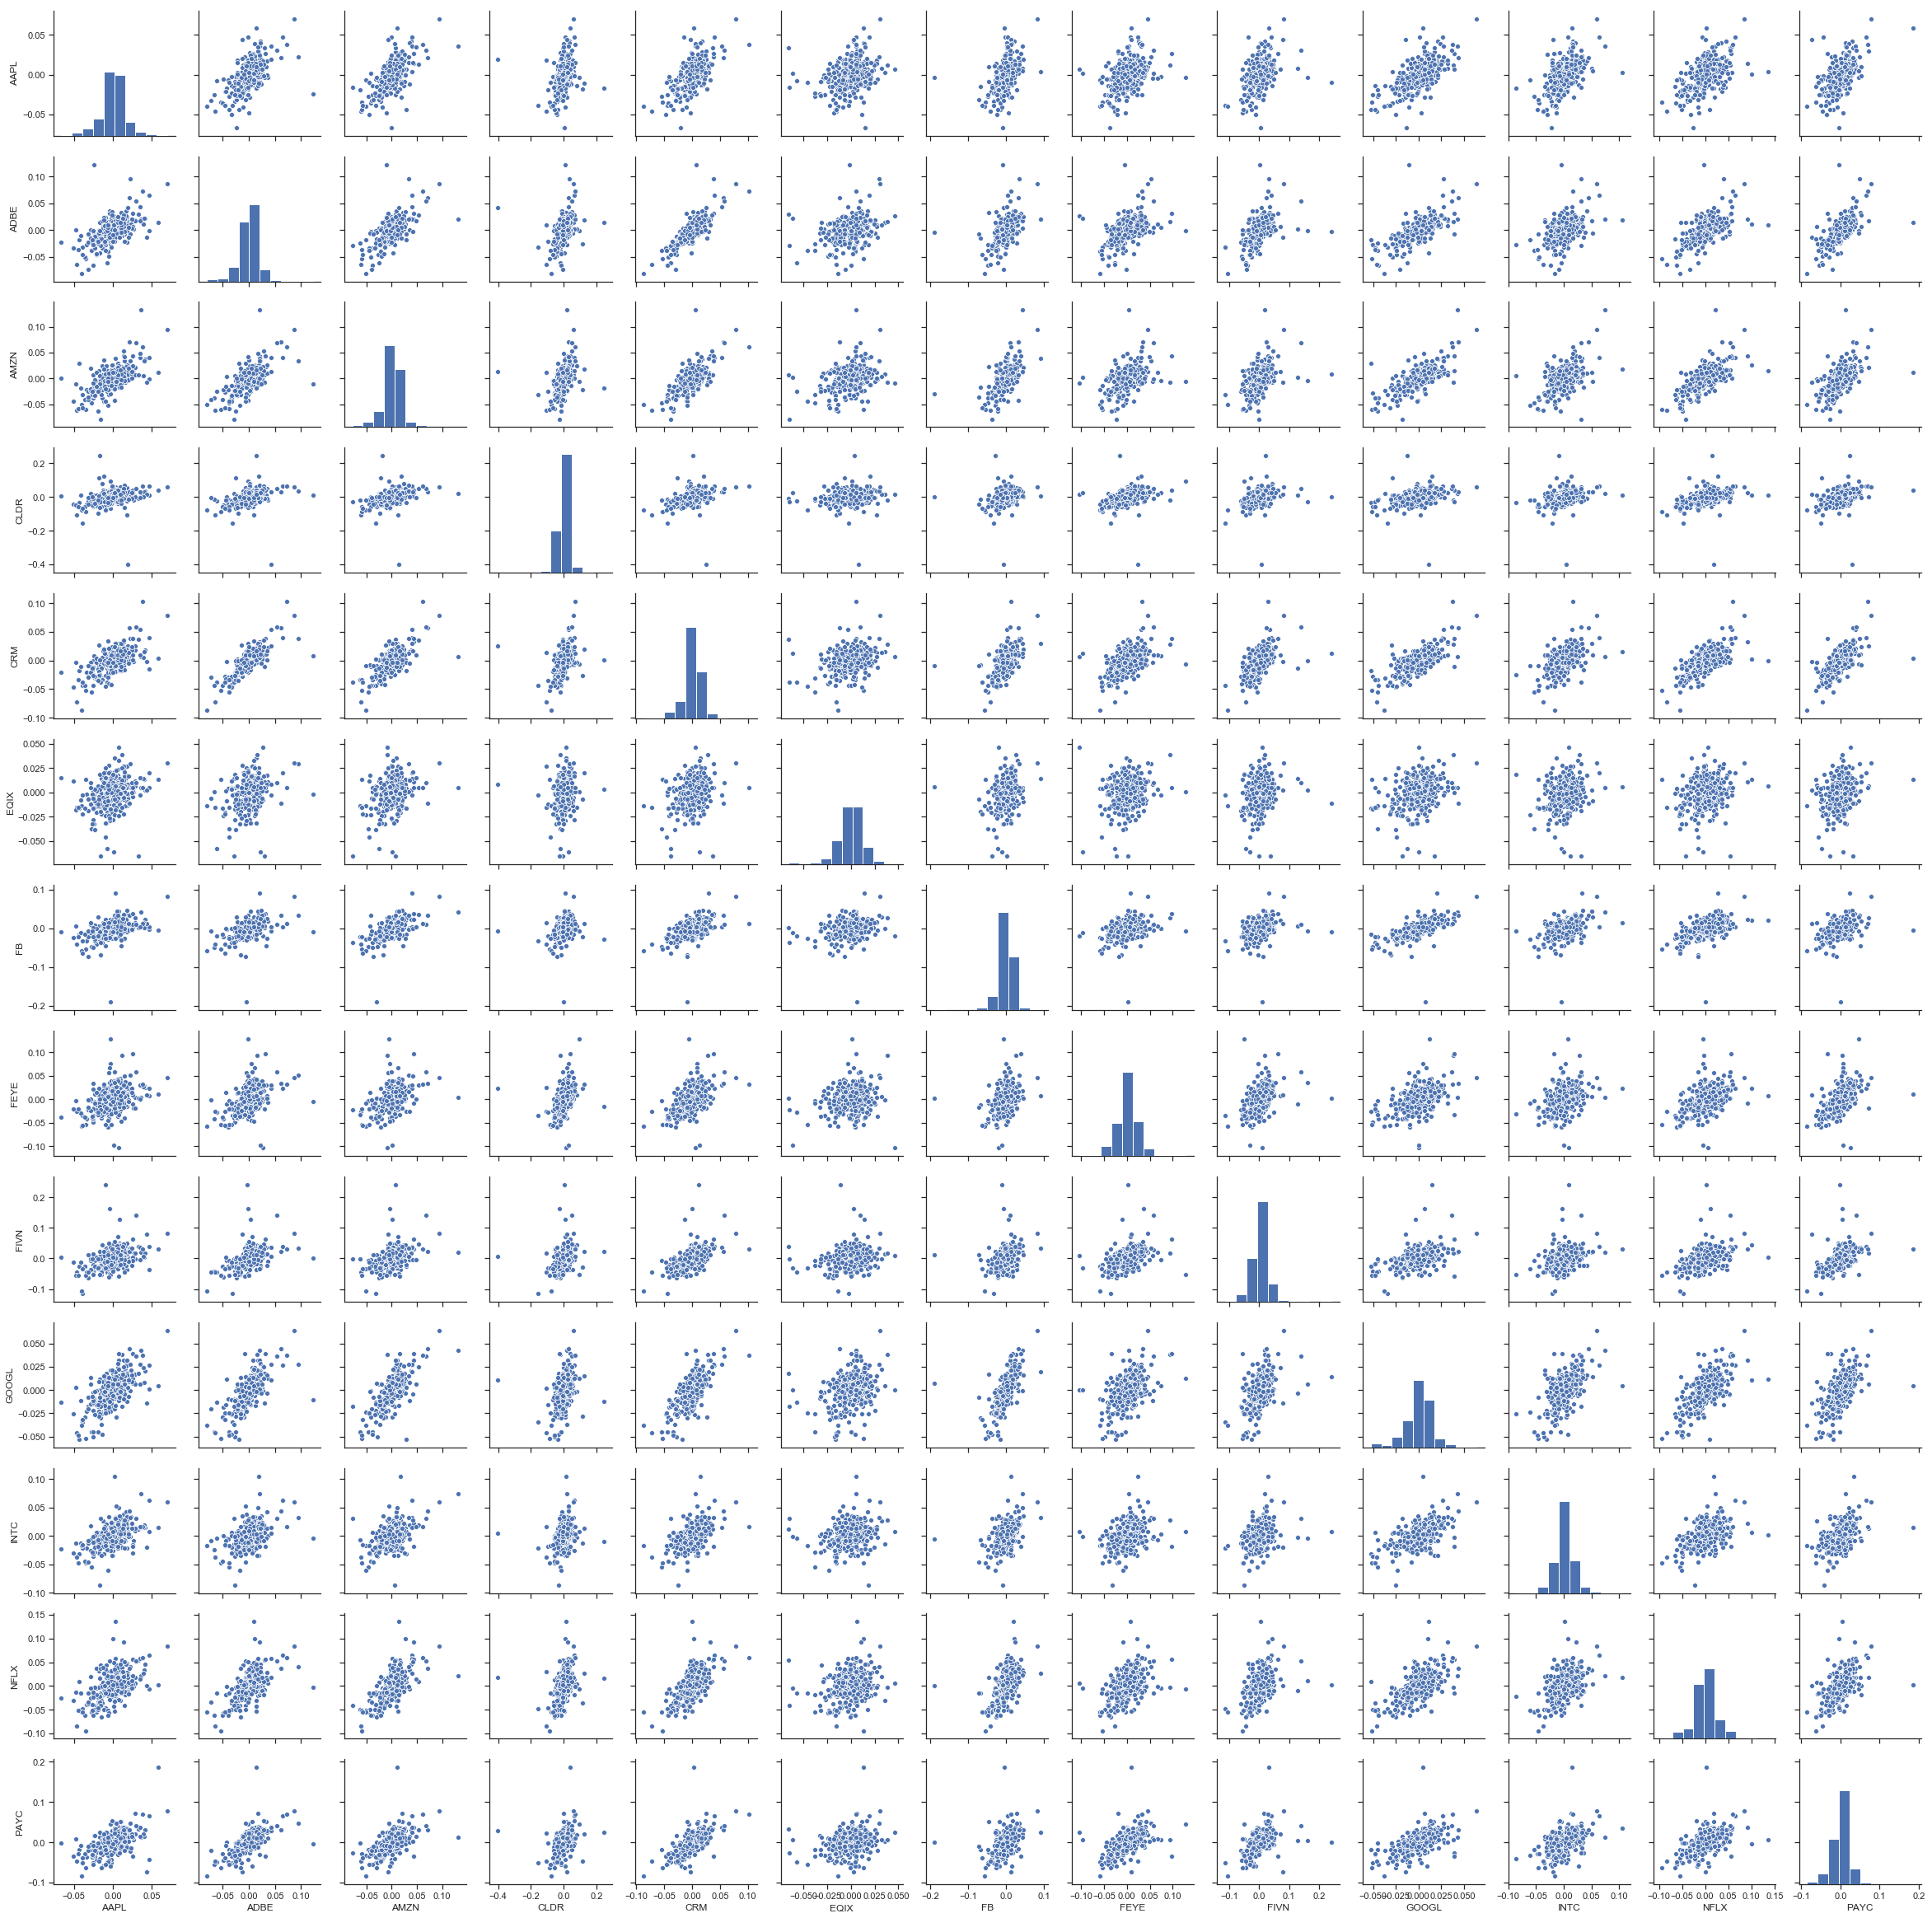

In [16]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

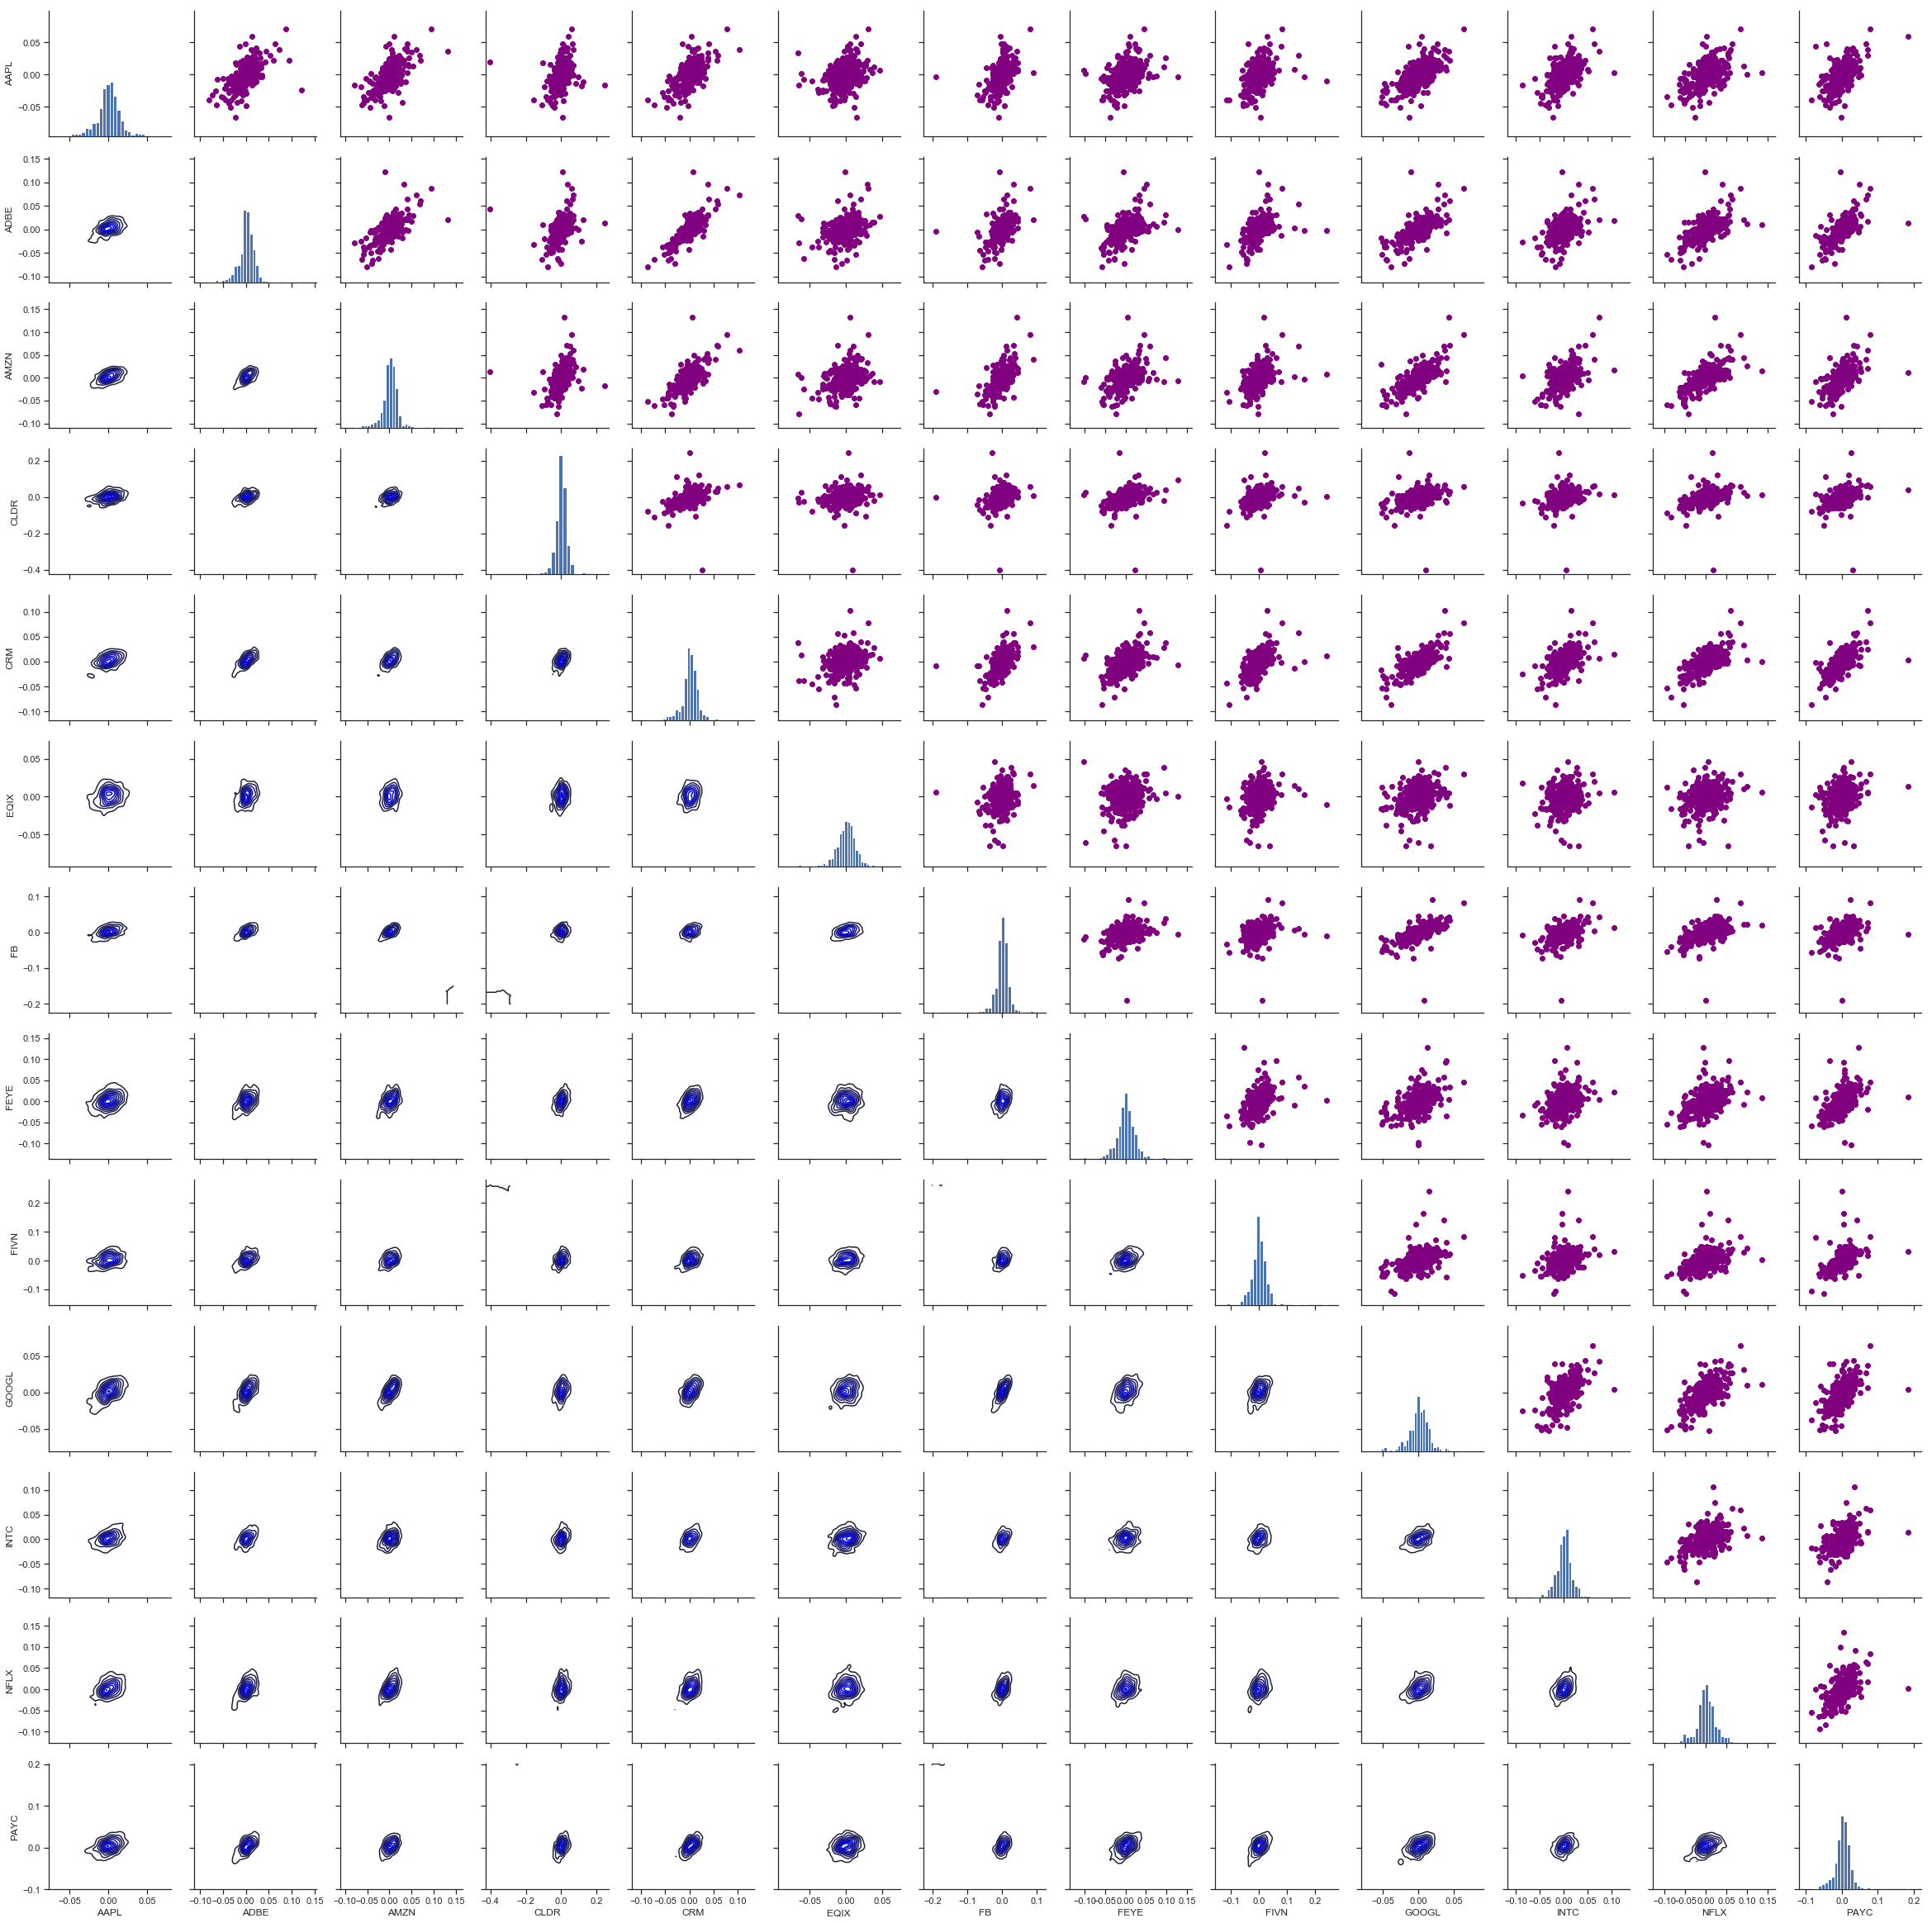

In [17]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

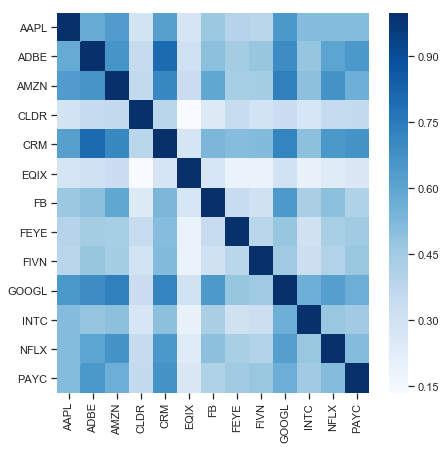

In [18]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

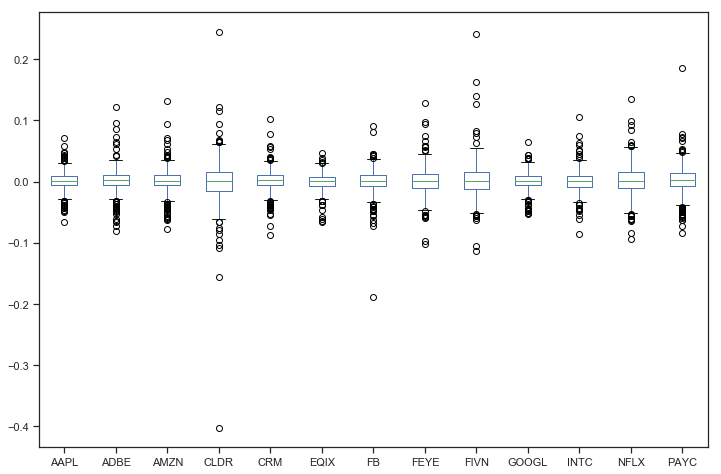

In [19]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

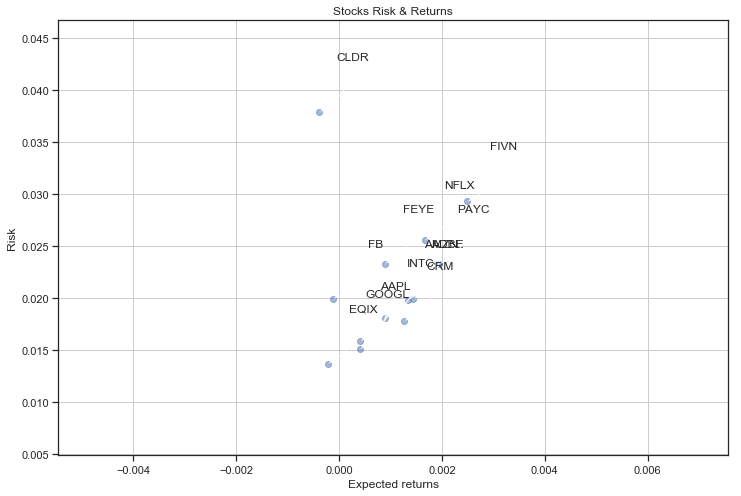

In [20]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

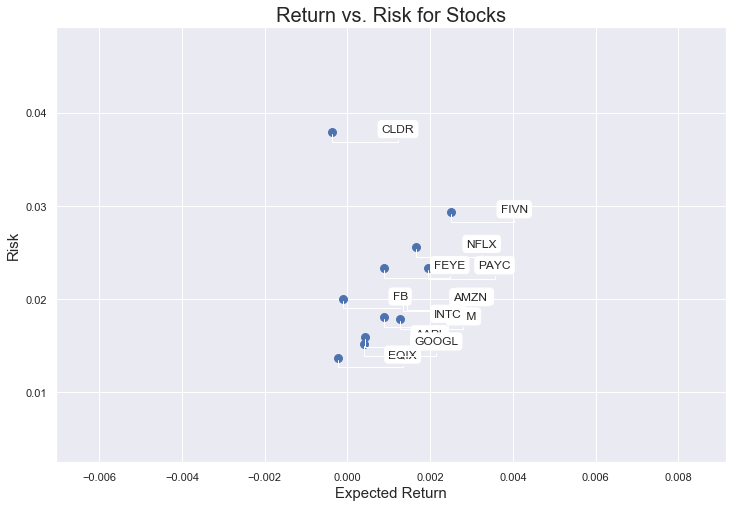

In [21]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [22]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

PAYC   PAYC     1.000000
NFLX   NFLX     1.000000
ADBE   ADBE     1.000000
AMZN   AMZN     1.000000
CLDR   CLDR     1.000000
CRM    CRM      1.000000
EQIX   EQIX     1.000000
FEYE   FEYE     1.000000
FIVN   FIVN     1.000000
GOOGL  GOOGL    1.000000
INTC   INTC     1.000000
FB     FB       1.000000
AAPL   AAPL     1.000000
CRM    ADBE     0.802700
ADBE   CRM      0.802700
AMZN   GOOGL    0.733855
GOOGL  AMZN     0.733855
CRM    GOOGL    0.720041
GOOGL  CRM      0.720041
AMZN   CRM      0.706310
CRM    AMZN     0.706310
GOOGL  ADBE     0.692089
ADBE   GOOGL    0.692089
AMZN   NFLX     0.668401
NFLX   AMZN     0.668401
PAYC   CRM      0.666215
CRM    PAYC     0.666215
ADBE   AMZN     0.663639
AMZN   ADBE     0.663639
NFLX   CRM      0.648659
                  ...   
FIVN   FB       0.307634
FB     FIVN     0.307634
EQIX   GOOGL    0.301542
GOOGL  EQIX     0.301542
FIVN   CLDR     0.298341
CLDR   FIVN     0.298341
       AAPL     0.291731
AAPL   CLDR     0.291731
CRM    EQIX     0.284850


In [23]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,AAPL,ADBE,AMZN,CLDR,CRM,EQIX,FB,FEYE,FIVN,GOOGL,INTC,NFLX,PAYC
2017-05-01,0.634196,0.446844,0.491163,0.629965,0.491804,0.638835,0.729129,0.434244,0.400108,0.528185,0.471847,0.499991,0.344431
2017-05-02,0.531439,0.392315,0.365261,0.639278,0.484909,0.642778,0.684129,0.351154,0.355244,0.490566,0.543688,0.440657,0.298411
2017-05-03,0.462735,0.390851,0.342059,0.767742,0.426091,0.592466,0.653748,1.000000,0.174310,0.555073,0.489012,0.385846,0.483329
2017-05-04,0.458688,0.387553,0.354047,0.580775,0.456936,0.608960,0.654306,0.601328,0.778175,0.507949,0.430359,0.456294,0.329450
2017-05-05,0.606311,0.404755,0.354589,0.653076,0.486170,0.627250,0.662208,0.607940,0.272465,0.411671,0.444470,0.391788,0.379518


In [24]:
Normalized_Value.corr()

,AAPL,ADBE,AMZN,CLDR,CRM,EQIX,FB,FEYE,FIVN,GOOGL,INTC,NFLX,PAYC
AAPL,1.000000,0.577556,0.637037,0.291731,0.619898,0.282320,0.463529,0.396292,0.387536,0.648306,0.511681,0.515645,0.515780
ADBE,0.577556,1.000000,0.663639,0.349971,0.802700,0.313211,0.498986,0.442358,0.474684,0.692089,0.476872,0.600985,0.648563
AMZN,0.637037,0.663639,1.000000,0.358453,0.706310,0.327905,0.595047,0.435358,0.441007,0.733855,0.496999,0.668401,0.563362
CLDR,0.291731,0.349971,0.358453,1.000000,0.383532,0.134144,0.252010,0.340687,0.298341,0.329382,0.276460,0.351394,0.356989
CRM,0.619898,0.802700,0.706310,0.383532,1.000000,0.284850,0.531105,0.508069,0.518641,0.720041,0.497242,0.648659,0.666215
EQIX,0.282320,0.313211,0.327905,0.134144,0.284850,1.000000,0.274201,0.188764,0.192525,0.301542,0.195254,0.241039,0.262389
FB,0.463529,0.498986,0.595047,0.252010,0.531105,0.274201,1.000000,0.342525,0.307634,0.645672,0.425594,0.496826,0.408672
FEYE,0.396292,0.442358,0.435358,0.340687,0.508069,0.188764,0.342525,1.000000,0.387619,0.475048,0.308747,0.429293,0.455137
FIVN,0.387536,0.474684,0.441007,0.298341,0.518641,0.192525,0.307634,0.387619,1.000000,0.458299,0.325703,0.406229,0.472254
GOOGL,0.648306,0.692089,0.733855,0.329382,0.720041,0.301542,0.645672,0.475048,0.458299,1.000000,0.560624,0.626107,0.565608


In [25]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

PAYC   PAYC     1.000000
NFLX   NFLX     1.000000
ADBE   ADBE     1.000000
AMZN   AMZN     1.000000
CLDR   CLDR     1.000000
CRM    CRM      1.000000
EQIX   EQIX     1.000000
FEYE   FEYE     1.000000
FIVN   FIVN     1.000000
GOOGL  GOOGL    1.000000
INTC   INTC     1.000000
FB     FB       1.000000
AAPL   AAPL     1.000000
CRM    ADBE     0.802700
ADBE   CRM      0.802700
AMZN   GOOGL    0.733855
GOOGL  AMZN     0.733855
CRM    GOOGL    0.720041
GOOGL  CRM      0.720041
AMZN   CRM      0.706310
CRM    AMZN     0.706310
GOOGL  ADBE     0.692089
ADBE   GOOGL    0.692089
AMZN   NFLX     0.668401
NFLX   AMZN     0.668401
PAYC   CRM      0.666215
CRM    PAYC     0.666215
ADBE   AMZN     0.663639
AMZN   ADBE     0.663639
NFLX   CRM      0.648659
                  ...   
FIVN   FB       0.307634
FB     FIVN     0.307634
EQIX   GOOGL    0.301542
GOOGL  EQIX     0.301542
FIVN   CLDR     0.298341
CLDR   FIVN     0.298341
       AAPL     0.291731
AAPL   CLDR     0.291731
CRM    EQIX     0.284850


In [26]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
AAPL     0.000412
ADBE     0.001447
AMZN     0.001348
CLDR    -0.000384
CRM      0.001261
EQIX    -0.000222
FB      -0.000119
FEYE     0.000886
FIVN     0.002493
GOOGL    0.000406
INTC     0.000891
NFLX     0.001667
PAYC     0.001954
dtype: float64
--------------------------------------------------
Stock risks:
AAPL     0.015902
ADBE     0.019941
AMZN     0.019881
CLDR     0.037911
CRM      0.017821
EQIX     0.013721
FB       0.019955
FEYE     0.023326
FIVN     0.029311
GOOGL    0.015130
INTC     0.018097
NFLX     0.025599
PAYC     0.023299
dtype: float64


In [27]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
CLDR,-0.000384,0.037911
EQIX,-0.000222,0.013721
FB,-0.000119,0.019955
GOOGL,0.000406,0.015130
AAPL,0.000412,0.015902
FEYE,0.000886,0.023326
INTC,0.000891,0.018097
CRM,0.001261,0.017821
AMZN,0.001348,0.019881
ADBE,0.001447,0.019941


In [28]:
table.sort_values(by='Risk')

,Returns,Risk
EQIX,-0.000222,0.013721
GOOGL,0.000406,0.015130
AAPL,0.000412,0.015902
CRM,0.001261,0.017821
INTC,0.000891,0.018097
AMZN,0.001348,0.019881
ADBE,0.001447,0.019941
FB,-0.000119,0.019955
PAYC,0.001954,0.023299
FEYE,0.000886,0.023326


In [29]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
AAPL,0.000412,0.015902,-0.602983
ADBE,0.001447,0.019941,-0.428924
AMZN,0.001348,0.019881,-0.435184
CLDR,-0.000384,0.037911,-0.273896
CRM,0.001261,0.017821,-0.490369
EQIX,-0.000222,0.013721,-0.744972
FB,-0.000119,0.019955,-0.507075
FEYE,0.000886,0.023326,-0.390724
FIVN,0.002493,0.029311,-0.256107
GOOGL,0.000406,0.015130,-0.634115


In [30]:
table['Max Returns'] = rets.max()

In [31]:
table['Min Returns'] = rets.min()

In [32]:
table['Median Returns'] = rets.median()

In [33]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
AAPL,0.000412,0.015902,-0.602983,0.070422,-0.066331,0.000512,0.966529
ADBE,0.001447,0.019941,-0.428924,0.122418,-0.080372,0.002083,1.393806
AMZN,0.001348,0.019881,-0.435184,0.132164,-0.078197,0.001529,1.620408
CLDR,-0.000384,0.037911,-0.273896,0.244275,-0.402428,0.000579,1.654412
CRM,0.001261,0.017821,-0.490369,0.102713,-0.087061,0.001986,1.700333
EQIX,-0.000222,0.013721,-0.744972,0.046290,-0.065439,0.000757,-0.082179
FB,-0.000119,0.019955,-0.507075,0.090613,-0.189609,0.000696,-1.584085
FEYE,0.000886,0.023326,-0.390724,0.128583,-0.102932,0.000677,0.745799
FIVN,0.002493,0.029311,-0.256107,0.241724,-0.114168,0.000782,1.180287
GOOGL,0.000406,0.015130,-0.634115,0.064164,-0.052802,0.001121,-0.164338


In [34]:
table['Average Return Yearly'] = (1 + total_return)**(1 / number_of_years) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly
AAPL,0.000412,0.015902,-0.602983,0.070422,-0.066331,0.000512,0.966529,0.003211
ADBE,0.001447,0.019941,-0.428924,0.122418,-0.080372,0.002083,1.393806,0.004625
AMZN,0.001348,0.019881,-0.435184,0.132164,-0.078197,0.001529,1.620408,0.005372
CLDR,-0.000384,0.037911,-0.273896,0.244275,-0.402428,0.000579,1.654412,0.005485
CRM,0.001261,0.017821,-0.490369,0.102713,-0.087061,0.001986,1.700333,0.005636
EQIX,-0.000222,0.013721,-0.744972,0.046290,-0.065439,0.000757,-0.082179,-0.000274
FB,-0.000119,0.019955,-0.507075,0.090613,-0.189609,0.000696,-1.584085,-0.005308
FEYE,0.000886,0.023326,-0.390724,0.128583,-0.102932,0.000677,0.745799,0.002480
FIVN,0.002493,0.029311,-0.256107,0.241724,-0.114168,0.000782,1.180287,0.003919
GOOGL,0.000406,0.015130,-0.634115,0.064164,-0.052802,0.001121,-0.164338,-0.000548


In [35]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly,CAGR
AAPL,0.000412,0.015902,-0.602983,0.070422,-0.066331,0.000512,0.966529,0.003211,0.111100
ADBE,0.001447,0.019941,-0.428924,0.122418,-0.080372,0.002083,1.393806,0.004625,0.230872
AMZN,0.001348,0.019881,-0.435184,0.132164,-0.078197,0.001529,1.620408,0.005372,0.218900
CLDR,-0.000384,0.037911,-0.273896,0.244275,-0.402428,0.000579,1.654412,0.005485,NaN
CRM,0.001261,0.017821,-0.490369,0.102713,-0.087061,0.001986,1.700333,0.005636,0.143146
EQIX,-0.000222,0.013721,-0.744972,0.046290,-0.065439,0.000757,-0.082179,-0.000274,0.056220
FB,-0.000119,0.019955,-0.507075,0.090613,-0.189609,0.000696,-1.584085,-0.005308,0.059085
FEYE,0.000886,0.023326,-0.390724,0.128583,-0.102932,0.000677,0.745799,0.002480,-0.066778
FIVN,0.002493,0.029311,-0.256107,0.241724,-0.114168,0.000782,1.180287,0.003919,0.469363
GOOGL,0.000406,0.015130,-0.634115,0.064164,-0.052802,0.001121,-0.164338,-0.000548,0.076431


In [36]:
table.sort_values(by='Average Return Yearly')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly,CAGR
FB,-0.000119,0.019955,-0.507075,0.090613,-0.189609,0.000696,-1.584085,-0.005308,0.059085
GOOGL,0.000406,0.015130,-0.634115,0.064164,-0.052802,0.001121,-0.164338,-0.000548,0.076431
EQIX,-0.000222,0.013721,-0.744972,0.046290,-0.065439,0.000757,-0.082179,-0.000274,0.056220
INTC,0.000891,0.018097,-0.503322,0.105519,-0.085890,0.000570,0.385032,0.001282,0.098682
FEYE,0.000886,0.023326,-0.390724,0.128583,-0.102932,0.000677,0.745799,0.002480,-0.066778
AAPL,0.000412,0.015902,-0.602983,0.070422,-0.066331,0.000512,0.966529,0.003211,0.111100
PAYC,0.001954,0.023299,-0.345354,0.185318,-0.084452,0.003171,0.998020,0.003316,0.326702
FIVN,0.002493,0.029311,-0.256107,0.241724,-0.114168,0.000782,1.180287,0.003919,0.469363
ADBE,0.001447,0.019941,-0.428924,0.122418,-0.080372,0.002083,1.393806,0.004625,0.230872
AMZN,0.001348,0.019881,-0.435184,0.132164,-0.078197,0.001529,1.620408,0.005372,0.218900
